In [54]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Constants

In [23]:
MAX_WORDS = 100 # Maximum Number of words from a message
EMBEDDING_SIZE = 100  # Embeddings Dimension
TEST_PCT = 0.25 # ratio of testing set
BATCH_SIZE = 64 # Batch size for Mini Batch processing for training
N_EPOCHS = 20 # number of epochs

In [14]:
messages_df = pd.read_csv('./Spam no Spam/spam.csv', encoding='ISO-8859-1')

In [7]:
messages_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
messages = messages_df['v2'].values

In [12]:
labels = messages_df['v1'].apply(lambda res: res.lower() == 'spam').astypepe('int')

In [20]:
labels, messages

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5567    1
 5568    0
 5569    0
 5570    0
 5571    0
 Name: v1, Length: 5572, dtype: int32,
 array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        'Ok lar... Joking wif u oni...',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        ..., 'Pity, * was in mood for that. So...any other suggestions?',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
        'Rofl. Its true to its name'], dtype=object))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(messages, labels, test_size=TEST_PCT, random_state=34)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4179,), (1393,), (4179,), (1393,))

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X = tokenizer.texts_to_sequences(X_train)

In [35]:
X[0], X_train[0]

([201, 225, 1, 32, 15, 3], 'Customer place i will call you.')

In [36]:
X = pad_sequences(X, maxlen=MAX_WORDS)

In [47]:
X[0].shape

(100,)

In [48]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'of': 14,
 'call': 15,
 'it': 16,
 'have': 17,
 'now': 18,
 'on': 19,
 'that': 20,
 '2': 21,
 'are': 22,
 'but': 23,
 'so': 24,
 'not': 25,
 'or': 26,
 "i'm": 27,
 'at': 28,
 'do': 29,
 'get': 30,
 'ur': 31,
 'will': 32,
 'if': 33,
 'be': 34,
 'can': 35,
 'just': 36,
 'with': 37,
 'we': 38,
 'no': 39,
 'this': 40,
 '4': 41,
 'when': 42,
 'gt': 43,
 'lt': 44,
 'up': 45,
 'all': 46,
 'go': 47,
 'ok': 48,
 'free': 49,
 'from': 50,
 'what': 51,
 'out': 52,
 'then': 53,
 'how': 54,
 'good': 55,
 'know': 56,
 'like': 57,
 'got': 58,
 'its': 59,
 'come': 60,
 'was': 61,
 'time': 62,
 'day': 63,
 'only': 64,
 'love': 65,
 'am': 66,
 'text': 67,
 'there': 68,
 'send': 69,
 'as': 70,
 'want': 71,
 'going': 72,
 'he': 73,
 'txt': 74,
 'one': 75,
 "i'll": 76,
 'sorry': 77,
 'lor': 78,
 'home': 79,
 'by': 80,
 'r': 81,
 'about': 82,
 'still': 83,
 'back': 84,
 't

In [51]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, EMBEDDING_SIZE))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         754800    
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 771,857
Trainable params: 771,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X, y_train, epochs=N_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

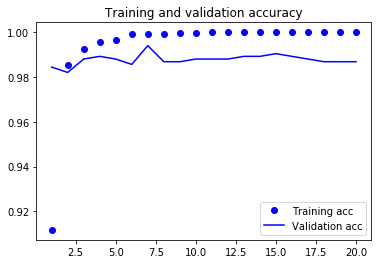

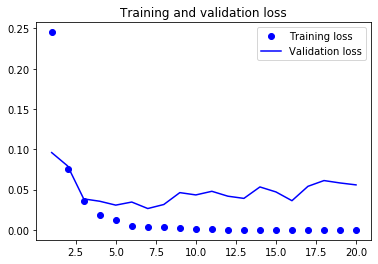

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [61]:
X_test[0], y_test

('Every King Was Once A Crying Baby And Every Great Building Was Once A Map.. Not Imprtant Where U r TODAY, BUT Where U Wil Reach TOMORW. Gud ni8',
 686     0
 3617    0
 1888    0
 1539    0
 720     0
        ..
 3076    0
 2048    0
 3942    0
 2329    0
 3444    0
 Name: v1, Length: 1393, dtype: int32)

In [63]:
tokenizer_test = Tokenizer()
tokenizer_test.fit_on_texts(X_test)
X_tst = tokenizer.texts_to_sequences(X_test)
X_tst = pad_sequences(X_tst, maxlen=MAX_WORDS)

In [64]:
result = model.evaluate(X_tst, y_test)

1393/1393 [==============================] - 2s 1ms/sample - loss: 0.6910 - acc: 0.6167


In [65]:
result

[0.6909999078499355, 0.6166547]